In [15]:
!pip list |grep Keras

Keras                    2.2.4                
Keras-Applications       1.0.8                
Keras-Preprocessing      1.1.0                


In [16]:
!git clone https://github.com/keras-team/keras.git

fatal: destination path 'keras' already exists and is not an empty directory.


In [17]:
import sys
import numpy
import matplotlib
import pandas
import keras

print('Python: {}'.format(sys.version))
print('Numpy: {}'.format(numpy.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('Pandas: {}'.format(pandas.__version__))
print('Keras: {}'.format(keras.__version__))

Python: 3.6.8 (default, Jan 14 2019, 11:02:34) 
[GCC 8.0.1 20180414 (experimental) [trunk revision 259383]]
Numpy: 1.16.4
Matplotlib: 3.0.3
Pandas: 0.24.2
Keras: 2.2.4


In [0]:
from keras import applications
from keras.applications.resnet50 import ResNet50
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
from keras.models import Model
from keras.layers.core import Dense, Lambda
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import GlobalAveragePooling2D, GlobalMaxPooling2D, MaxPooling2D
from keras.layers import Input, Dropout
from keras.layers.merge import concatenate, add
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2
from keras.utils.layer_utils import convert_all_kernels_in_model
from keras.utils.data_utils import get_file
from keras.engine.topology import get_source_inputs
from keras_applications.imagenet_utils import _obtain_input_shape
import keras.backend as K
from keras.applications.resnet50 import preprocess_input, decode_predictions



In [19]:
model = ResNet50(
  weights = 'imagenet',
  include_top = True)

model.summary()

epochs = 10
img_size = 336

input_tensor = Input(shape=(img_size, img_size, 3))

base_model = ResNet50(
    weights='imagenet',
    include_top = False,
    input_tensor = input_tensor)


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [20]:
base_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 336, 336, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 342, 342, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 168, 168, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 168, 168, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [21]:
for layer in base_model.layers:
    layer.trainable = True
    
base_model.layers[0].trainable = False
base_model.layers[1].trainable = False

model = Model(
    inputs = base_model.input,
    outputs = base_model.get_layer(index = -2).output)

model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 336, 336, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 342, 342, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 168, 168, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 168, 168, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [0]:
x = base_model.output
x = GlobalAveragePooling2D()(x)

# x = Dense(
#     1024,
#     activation = 'relu')(x)

# x = Dropout(0.5)(x)

# x = Dense(
#     512,
#     activation = 'relu')(x)

output = Dense(
    5,
    activation='softmax')(x)

model = Model(
    inputs=base_model.input,
    outputs=output)

In [23]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 336, 336, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 342, 342, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 168, 168, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 168, 168, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [0]:
from keras.preprocessing import image 
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.1,
    horizontal_flip = True,
    vertical_flip = True,
    validation_split = 0.0)
#     width_shift_range=0.2,
#     height_shift_range=0.2)

valid_datagen = ImageDataGenerator(
    rescale=1./255)

In [25]:
train_generator = train_datagen.flow_from_directory(
        '/content/drive/My Drive/data/train',
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

valid_generator = valid_datagen.flow_from_directory(
        '/content/drive/My Drive/data/valid',
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

Found 4438 images belonging to 5 classes.
Found 1218 images belonging to 5 classes.


In [0]:
x_batch, y_batch = next(train_generator)

In [27]:
print(x_batch.max())
print(x_batch.min())

1.0
0.0


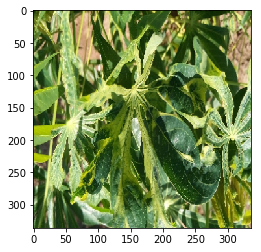

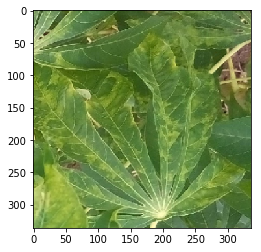

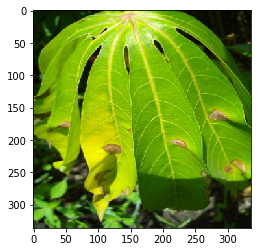

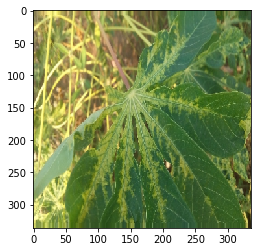

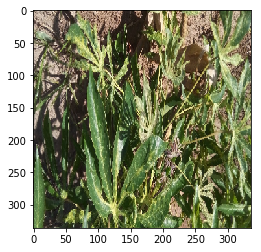

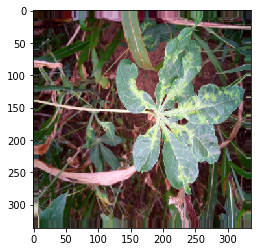

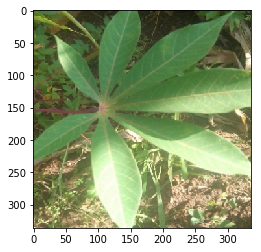

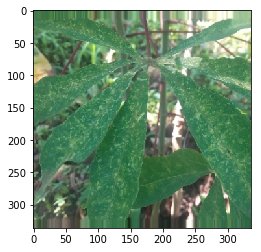

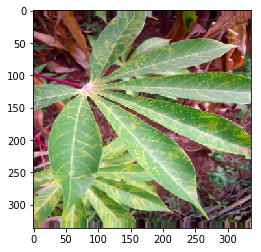

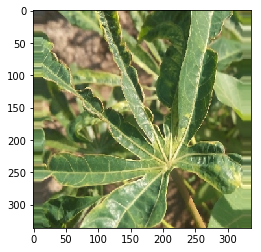

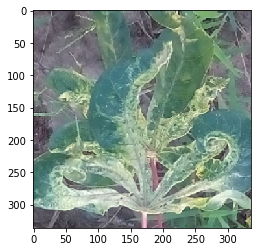

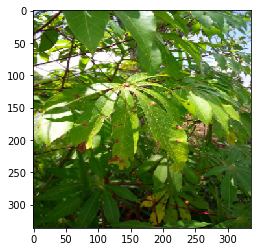

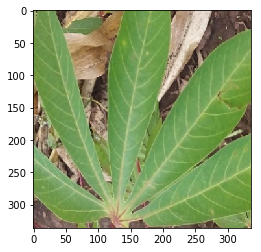

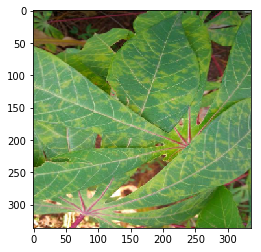

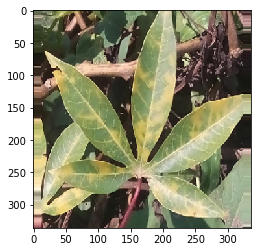

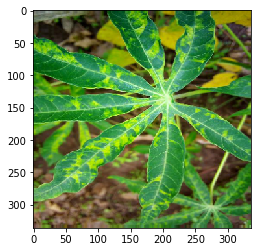

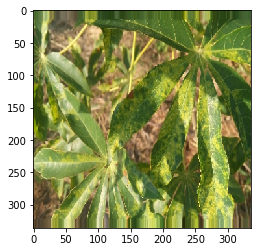

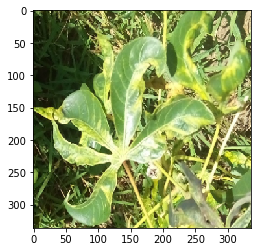

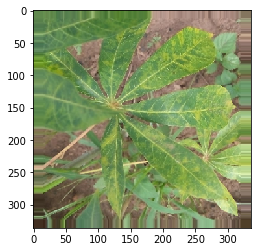

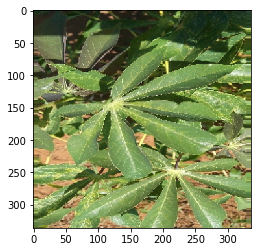

In [28]:
import matplotlib.pyplot as plt

for i in range (0,20):
    image = x_batch[i]
    plt.imshow(image)
    plt.show()

In [29]:
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint


model.compile(loss='binary_crossentropy',
              optimizer = Adam(lr = 1e-5),
              metrics = ['accuracy'])

# early_stop = EarlyStopping(
#     monitor='val_loss',
#     patience=10,
#     verbose=1,
#     restore_best_weights=False)

filepath="weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"

# checkpoint = ModelCheckpoint(
#     filepath,
#     monitor='val_acc',
#     verbose=1,
#     save_best_only=True,
#     mode='max',
#     period = 5)


W0624 03:13:21.105007 140334055495552 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0624 03:13:21.127343 140334055495552 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [17]:
history = model.fit_generator(generator = train_generator,
                   validation_steps = valid_generator.n // valid_generator.batch_size + 1,
                   validation_data = valid_generator,
                   steps_per_epoch = train_generator.n // train_generator.batch_size + 1,
                    epochs = epochs)
#                    callbacks = [checkpoint])

Epoch 1/10
222/222 [==============================] - 3153s 14s/step - loss: 0.2824 - acc: 0.8835 - val_loss: 0.2007 - val_acc: 0.9190
Epoch 2/10
222/222 [==============================] - 166s 749ms/step - loss: 0.1915 - acc: 0.9233 - val_loss: 0.1845 - val_acc: 0.9335
Epoch 3/10
222/222 [==============================] - 167s 753ms/step - loss: 0.1545 - acc: 0.9423 - val_loss: 0.1639 - val_acc: 0.9396
Epoch 4/10
222/222 [==============================] - 167s 753ms/step - loss: 0.1366 - acc: 0.9489 - val_loss: 0.1657 - val_acc: 0.9456
Epoch 5/10
222/222 [==============================] - 167s 752ms/step - loss: 0.1154 - acc: 0.9585 - val_loss: 0.1730 - val_acc: 0.9445
Epoch 6/10
222/222 [==============================] - 168s 755ms/step - loss: 0.1008 - acc: 0.9645 - val_loss: 0.1522 - val_acc: 0.9494
Epoch 7/10
222/222 [==============================] - 168s 756ms/step - loss: 0.0950 - acc: 0.9656 - val_loss: 0.1526 - val_acc: 0.9521
Epoch 8/10
222/222 [=============================

In [21]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator=test_datagen.flow_from_directory(
                directory="/content/drive/My Drive/data/test",
                batch_size=1,
                seed=42,
                shuffle=False,
                class_mode='categorical',
                target_size=(img_size,img_size))

STEP_SIZE_TEST=test_generator.n
test_generator.reset()



Found 3774 images belonging to 1 classes.


In [22]:
pred=model.predict_generator(test_generator,
                steps=STEP_SIZE_TEST,
                verbose=1)

3774/3774 [==============================] - 2690s 713ms/step


In [0]:
import numpy as np
import pandas as pd 

predicted_class_indices = np.argmax(
    pred,
    axis=1)

In [24]:
len(predicted_class_indices)

3774

In [25]:
predicted_class_indices[:10]

array([1, 1, 3, 2, 1, 3, 3, 3, 3, 2])

In [0]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]
filenames=test_generator.filenames
results=pd.DataFrame({"Category":predictions,
                      "id":filenames})

In [27]:
results.head()

,Category,id
0,cbsd,0/test-img-0.jpg
1,cbsd,0/test-img-1.jpg
2,cmd,0/test-img-10.jpg
3,cgm,0/test-img-100.jpg
4,cbsd,0/test-img-1000.jpg


In [28]:
results.Category.value_counts()

cmd        1906
cbsd        893
cgm         482
cbb         288
healthy     205
Name: Category, dtype: int64

In [0]:
results.to_csv("submission.csv",index=False)

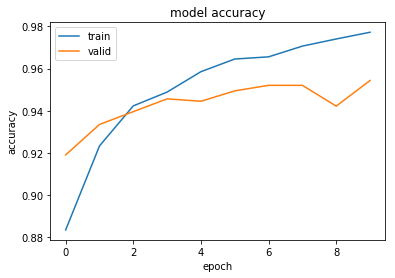

In [29]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

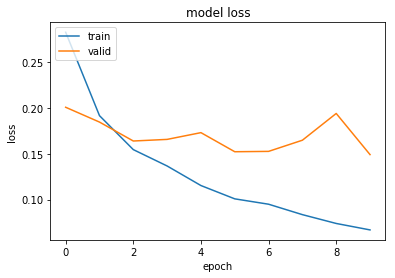

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()